In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bbc-text.csv to bbc-text.csv


In [ ]:
import io
import pandas as pd

data = pd.read_csv(io.BytesIO(uploaded['bbc-text.csv']))# Dataset is now stored in a Pandas Dataframe

In [ ]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


# Understanding features and Target Variables


In [ ]:
data['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [ ]:
data.shape

(2225, 2)

This means 225 datapoints and 2 columns (category of news and text which is the article name.

In [ ]:
data.dtypes

category    object
text        object
dtype: object

# Check for null values

In [ ]:
data.isnull().any

<bound method DataFrame.any of       category   text
0        False  False
1        False  False
2        False  False
3        False  False
4        False  False
...        ...    ...
2220     False  False
2221     False  False
2222     False  False
2223     False  False
2224     False  False

[2225 rows x 2 columns]>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


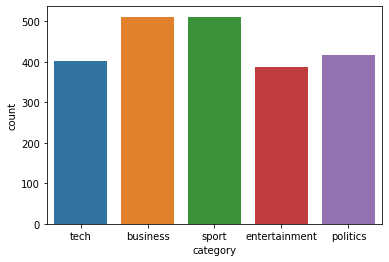

In [ ]:
# Countplot pf Target Variable (category)
import seaborn as sns
sns.countplot(data.category)

In [ ]:
data['News_length'] = data['text'].str.len()
data['News_length']

0       4333
1       1842
2       1342
3       2176
4       1579
        ... 
2220    1745
2221     955
2222    1648
2223    4684
2224    1167
Name: News_length, Length: 2225, dtype: int64

the 0th ( 0 index) News article , that is the 1st news article (data point) has 4333 words in it.

Text(0.5, 0.98, 'News Length Distribution')

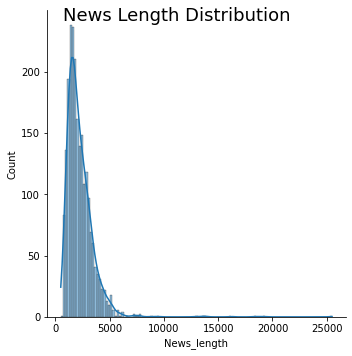

In [ ]:
# lets check the length of the articles using "Distribution Plot"

plot = sns.displot(data['News_length'], kde=True)
             
plot.fig.suptitle("News Length Distribution",
                  fontsize=18, fontdict={"weight": "bold"})


So from the above distribution plot, there are not many articles which are of 10000 news_length (which are pretty long articles).

lets explore deep into this.

# WordCloud

We will plot a wordcloud for each word category.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
def create_wordcloud(words):
  wordcloud = WordCloud(width=800, height = 500, random_state= 21, max_font_size= 110).generate(words)
  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()

I have stored entire news articles related to the "business" category in the variable called "subset".

The "Text" variable below contains "list of sentences".

But the above "create_wordcloud" function takes input as string "words" and not "list of sentences".

So, using "join", the list of sentences are (concatenated) converted into paragraphs of sentences.
And then call the function to draw wordcloud figures.


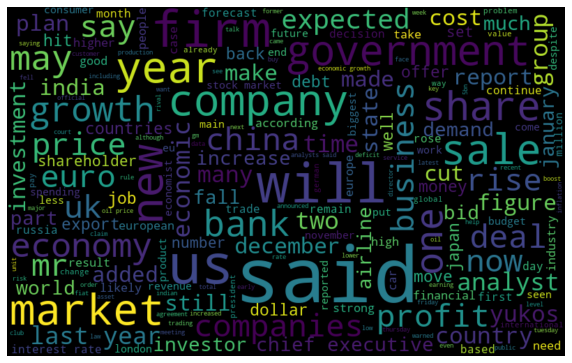

In [ ]:
subset = data[data.category == "business"]
Text = subset.text.values
words = ''.join(Text)
create_wordcloud(words)


So the above figure shows the most frequent words appearing in the news article related to the "business" categgory.

Nows lets check out the wordcloud for other news article categories.

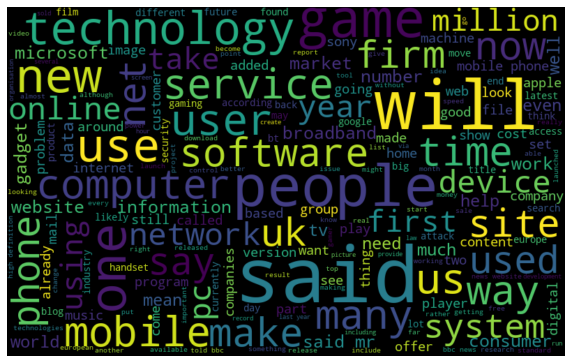

In [ ]:
subset = data[data.category == "tech"]
Text = subset.text.values
words = ''.join(Text)
create_wordcloud(words)

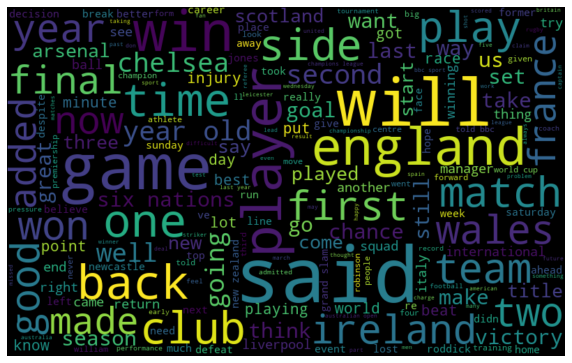

In [ ]:
subset = data[data.category == "sport"]
Text = subset.text.values
words = ''.join(Text)
create_wordcloud(words)

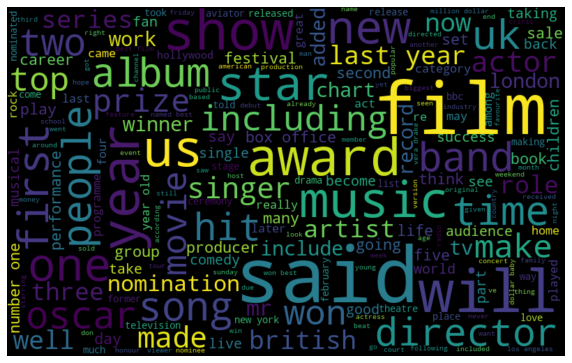

In [ ]:
subset = data[data.category == "entertainment"]
Text = subset.text.values
words = ''.join(Text)
create_wordcloud(words)

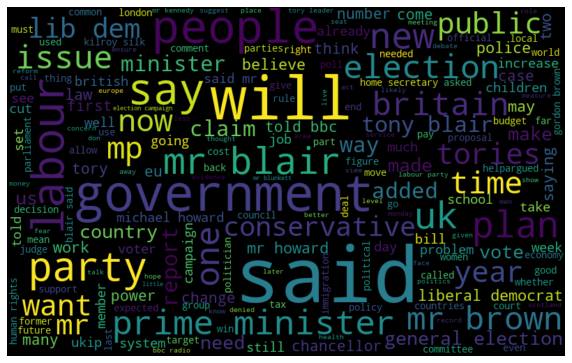

In [ ]:
subset = data[data.category == "politics"]
Text = subset.text.values
words = ''.join(Text)
create_wordcloud(words)

# Cleaning (Preprocessing) data

In [ ]:
import re

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def process_text(Text):
  Text = Text.lower().replace('\n', ' ').replace('\r', ' ').strip()  # Remove all line breaks from a long string of text
  Text = re.sub(' +', ' ',Text)  # to delete multiple spaces generated from above line.
  Text = re.sub(r'[^\w\s]', '', Text) #to get only the alphabets from it.

  stop_words = set(stopwords.words('english')) # stop words in English language.
  word_tokens = word_tokenize(Text)
  filtered_sentence = [w for w in word_tokens if not w in stop_words] # remove stop words and words which are not in stop words list is stored in filtered_sentence.
  
  Text = ' '.join(filtered_sentence)
  return Text

# the code snippet below does the same thing as this codeline:  filtered_sentence = [w for w in word_tokens if not w in stop_words]

# filtered_sentence = []
#  for w in word_tokens:
#    if w not in stop_words:
#      filtered_sentence.append(w)
      
# Note that filtered_sentence contians "list of words" and we need to convert those "list of words" into sentence form by joining them.



In [ ]:

data['Text_parsed'] = data['text'].apply(process_text)


In [ ]:
data.head()

,category,text,News_length,Text_parsed
0,tech,tv future in the hands of viewers with home th...,4333,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,1842,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,1342,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,2176,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,ocean twelve raids box office ocean twelve cri...


**Note**:  
- `Text` column on left side includes `unprocessed text` --> raw text from the dataset. 
- Whereas, `Text_parsed` column on the right side includes `processed_text`.

So far we have completed the following steps:
- data acquisition
- data exploration
- data preprocessing

Now we will preform the following steps:
- label encoding
- convert words into vectors using `TF-IDF` Vectorizer  (Term Frequency - Inverse Document Frequency)
- Apply Machine Learning Algorithms

**Most important takeaway of this project is to compare machine learnign algorithms with deep learning algoithm of LSTM.**

- So after model evaluation of machine learning algorithms wwe will switch towards applying LSTM in Keras.



# Label Encoding

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['Category_Target'] = label_encoder.fit_transform(data['category'])

In [ ]:
data.head()

,category,text,News_length,Text_parsed,Category_Target
0,tech,tv future in the hands of viewers with home th...,4333,tv future hands viewers home theatre systems p...,4
1,business,worldcom boss left books alone former worldc...,1842,worldcom boss left books alone former worldcom...,0
2,sport,tigers wary of farrell gamble leicester say ...,1342,tigers wary farrell gamble leicester say rushe...,3
3,sport,yeading face newcastle in fa cup premiership s...,2176,yeading face newcastle fa cup premiership side...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,ocean twelve raids box office ocean twelve cri...,1


From the above output, the newly added last column `Category_Target` we can see the the `tech` category is assigned `4` whereas `business` category is assigned `0` and so on.

In [ ]:
data.to_csv('BBC_news_preprocessed_data.csv')

# Split the data for Training and testing 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['Text_parsed'], 
                                                     data['Category_Target'], 
                                                     test_size = 0.2,
                                                     random_state=8)

- Features of training data in X_train 
- Labels of training data in y_train


In [ ]:
X_train.shape

(1780,)

1780 news articles I have in training dataset

In [ ]:
X_test.shape

(445,)

445 news articles in testing dataset

In [ ]:
y_train.shape

(1780,)

In [ ]:
y_test.shape

(445,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# parameters needed for TF-IDF 
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300


In [ ]:
tfidf = TfidfVectorizer(encoding = 'utf-8', 
                        ngram_range = ngram_range, 
                        stop_words = None, 
                        lowercase = False, 
                        max_df = max_df, 
                        min_df = min_df, 
                        max_features = max_features,
                        norm = 'l2',  # note is "small L and 2"  not 12 (twelve ).
                        sublinear_tf = True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train  = y_train

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test

In [ ]:
labels_train.shape

(1780,)

In [ ]:
labels_test.shape

(445,)

In [ ]:
features_train.shape

(1780, 300)

In [ ]:
features_test.shape

(445, 300)

# Building Models

# 1. RandomForest Classifier

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model = RandomForestClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions)) # beacause the classes are more or less balanced.
print(classification_report(labels_test, model_predictions))

Accuracy 0.950561797752809
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       105
           1       0.94      0.95      0.95        85
           2       0.94      0.94      0.94        77
           3       0.97      0.95      0.96       102
           4       0.99      0.97      0.98        76

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445



The `accuracy_score` takes 2 parameters:
- 1st paramtere is the ground truth (y_test) --> labels_test 
- 2nd parameter is model_predictions (predicted labesls)

# 2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions)) # beacause the classes are more or less balanced.
print(classification_report(labels_test, model_predictions))

Accuracy 0.9617977528089887
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.99      0.96      0.98        85
           2       0.95      0.95      0.95        77
           3       0.97      0.99      0.98       102
           4       0.97      0.96      0.97        76

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



# 3. KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions)) # beacause the classes are more or less balanced.
print(classification_report(labels_test, model_predictions))

Accuracy 0.9550561797752809
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       105
           1       0.95      0.95      0.95        85
           2       0.97      0.96      0.97        77
           3       0.99      0.93      0.96       102
           4       0.95      0.97      0.96        76

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



The accury has dropped without hyperparameter fine tuning for KNeighborsClassifier.

# 4. DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions)) # beacause the classes are more or less balanced.
print(classification_report(labels_test, model_predictions))

Accuracy 0.8292134831460675
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       105
           1       0.85      0.85      0.85        85
           2       0.76      0.79      0.78        77
           3       0.88      0.90      0.89       102
           4       0.85      0.83      0.84        76

    accuracy                           0.83       445
   macro avg       0.83      0.83      0.83       445
weighted avg       0.83      0.83      0.83       445



So a decision tree classifier is not performing well for this problem as the accuracy has dropped to 83%.

# 5. GaussianNB Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions)) # beacause the classes are more or less balanced.
print(classification_report(labels_test, model_predictions))


Accuracy 0.9101123595505618
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       105
           1       0.93      0.81      0.87        85
           2       0.92      0.94      0.93        77
           3       0.93      0.95      0.94       102
           4       0.84      0.96      0.90        76

    accuracy                           0.91       445
   macro avg       0.91      0.91      0.91       445
weighted avg       0.91      0.91      0.91       445

